# MOVIMIENTO BROWNIANO BRIDGE

## Módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

## Definición de Parámetros

In [2]:
# Número de subintervalos
N = 10000
# Horizonte de tiempo (hasta donde vamos a graficar las trayectorias)
T = 1.  
# Tamaño del incremento
dt = T/N
# Replicabilidad de resultados
np.random.seed(100)

## Una Trayectoria (simulación)

In [3]:
# Número de simulaciones
n_sims = 1

# Intervalo de tiempo
tiempos = np.linspace(0, T, N)
tiempos

array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])

In [4]:
# MBE

dB = np.random.normal(scale= np.sqrt(dt), size=(n_sims, N-1))
B = np.cumsum(dB, axis=1)
mbe = np.insert(B, 0, 0.0, axis=1)
mbe

array([[ 0.        , -0.01749765, -0.01407085, ...,  0.11435903,
         0.10986902,  0.11719629]])

In [ ]:
print(mbe.size)
print(tiempos.size)

10000
10000


In [ ]:
tiempos*mbe[0][N-1]

array([-0.00000000e+00, -4.01777645e-06, -8.03555291e-06, ...,
       -4.01657112e-02, -4.01697290e-02, -4.01737467e-02])

In [5]:
# MBB

mbb = mbe - tiempos*mbe[0][N-1]

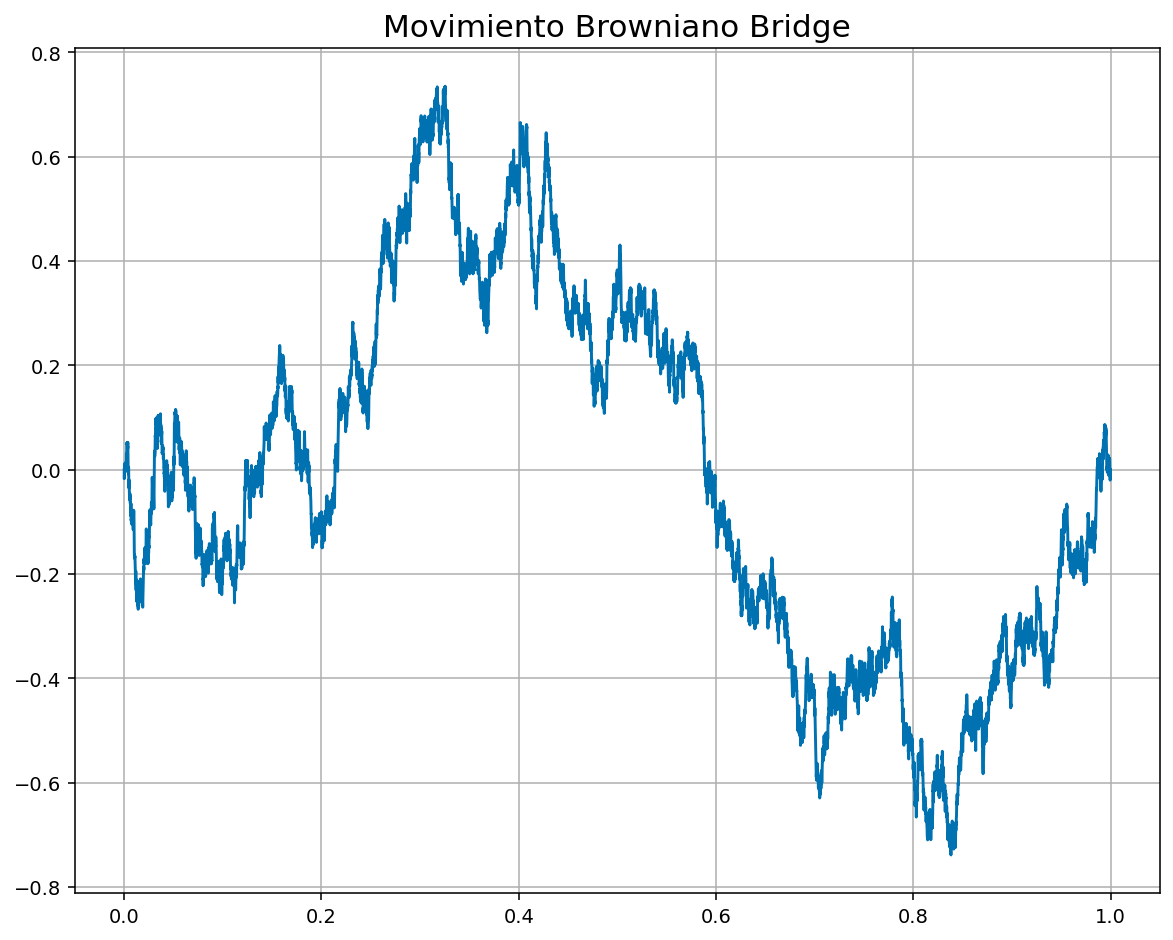

In [6]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(10,8), dpi=70)
ax.set_title('Movimiento Browniano Bridge', fontsize=16)
ax.plot(tiempos, np.transpose(mbb))
ax.grid(True)

## Una trayectoria para distintos valores de N

In [7]:
# Lista de valores de N (# subintervalos)
vN = [10, 100, 1000, 10000]

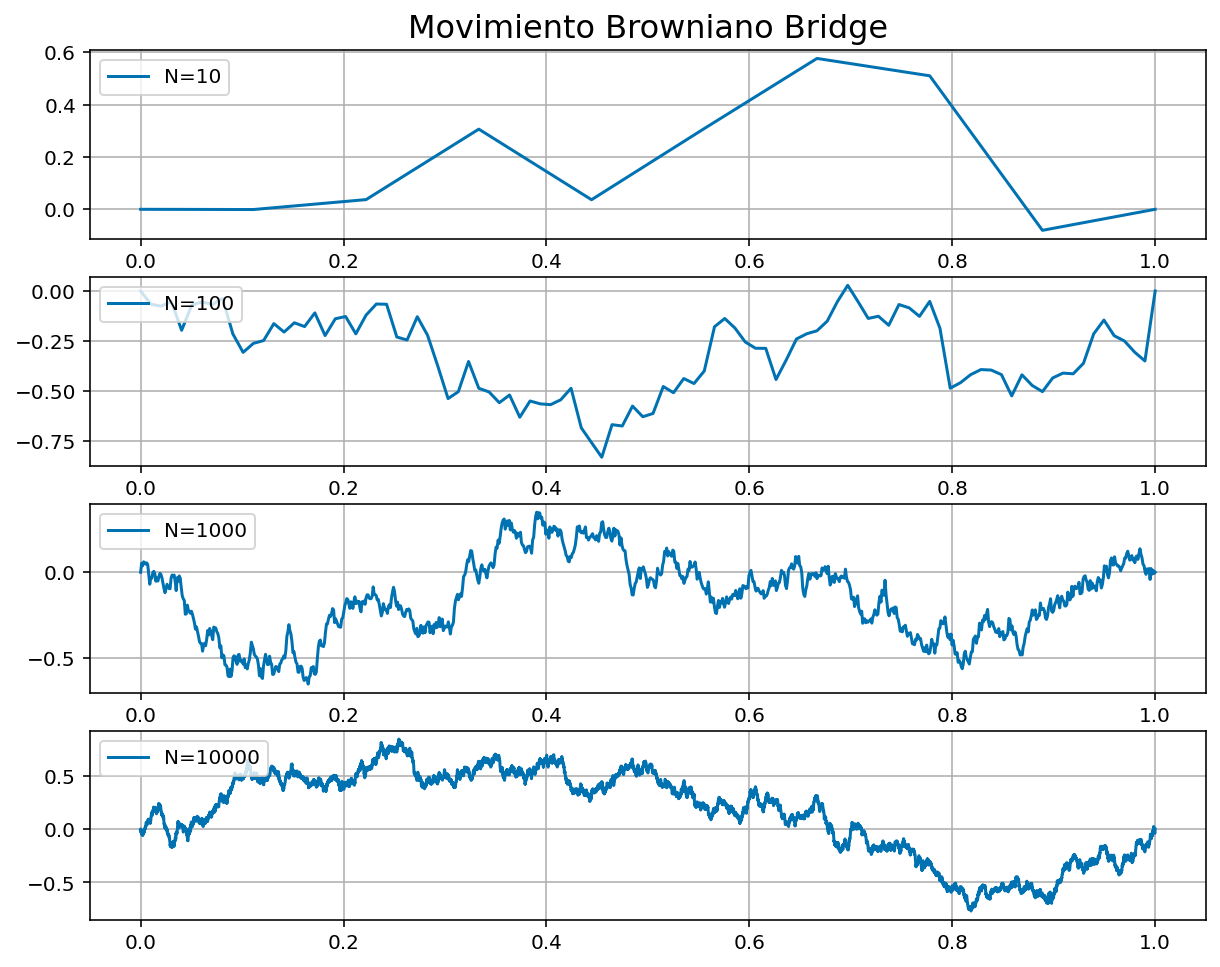

In [8]:
# Gráfica
fig, ax = plt.subplots(4, figsize=(10,8))
ax[0].set_title('Movimiento Browniano Bridge', fontsize=16)

for i in range(0,4):
  tiempos = np.linspace(0, T, vN[i])
  dt=T/vN[i]
  dB = np.random.normal(scale= np.sqrt(dt), size=(n_sims, vN[i]-1))
  B = np.cumsum(dB, axis=1)
  mbe = np.insert(B, 0, 0.0, axis=1)
  mbb = mbe - tiempos*mbe[0][vN[i]-1]
  ax[i].plot(tiempos, np.transpose(mbb),label=f'N={vN[i]:.0f}')
  ax[i].legend(loc='upper left');
  ax[i].grid(True)

## Múltiples Trayectorias (simulaciones)

In [9]:
# Parámetros

N=10000
dt=T/N
n_sims = 1000

In [10]:
# Intervalo de tiempo
tim = np.linspace(0, T, N)

In [11]:
# MBE

dB = np.random.normal(scale= np.sqrt(dt), size=(n_sims, N-1))
B = np.cumsum(dB, axis=1)
mbe = np.insert(B, 0, 0.0, axis=1)
# Las trayectorias se generan por filas, i.e, en cada fila hay una trayectoria
mbe

array([[ 0.00000000e+00,  1.29486919e-03,  3.79930611e-03, ...,
        -7.10056837e-01, -7.15176361e-01, -7.09944456e-01],
       [ 0.00000000e+00,  8.40112220e-03,  1.18528286e-02, ...,
         1.14616126e-01,  1.23593527e-01,  1.35793806e-01],
       [ 0.00000000e+00, -9.37649916e-03, -1.72531155e-02, ...,
         6.36017347e-01,  6.34179306e-01,  6.35583606e-01],
       ...,
       [ 0.00000000e+00, -1.35989599e-02, -7.35554772e-03, ...,
        -1.33400754e+00, -1.32393441e+00, -1.33706766e+00],
       [ 0.00000000e+00,  1.21258298e-02,  5.43797763e-03, ...,
        -7.48667990e-01, -7.47643498e-01, -7.51158179e-01],
       [ 0.00000000e+00,  5.56262494e-03,  7.62521719e-03, ...,
        -1.12509967e+00, -1.13653856e+00, -1.13588150e+00]])

In [12]:
# array de el último valor de mbe en cada trayectoria
mbe_f = []
for i in range(0, len(mbe)):  
  mbe_f.append(mbe[i][N-1])

# B1
mbe_1 = np.array(mbe_f)
mbe_1

array([-7.09944456e-01,  1.35793806e-01,  6.35583606e-01,  7.52173619e-01,
       -6.27146126e-01,  4.42874559e-01,  1.50362952e+00, -3.45548554e-01,
       -4.46601632e-01, -1.25609846e-01,  2.33613310e-01,  1.72467106e-02,
        7.57996162e-01,  1.15250943e+00, -2.49834792e-01,  1.09441711e+00,
       -3.58469880e-01, -5.50833606e-01,  1.05912642e+00,  1.21440407e+00,
       -1.89978637e+00,  9.58889134e-01, -4.69980778e-01, -5.41010252e-02,
        6.01465938e-01,  6.92969593e-01, -8.59799907e-01,  6.31998191e-01,
        6.95188524e-01,  3.45646923e-01,  4.65169058e-01, -1.63992279e-01,
       -2.42034164e-01, -2.69078533e-01, -5.45058416e-01, -1.07155625e+00,
        8.35115844e-01, -3.27169464e-01,  1.63605133e-01, -2.51737367e-01,
        6.86261324e-03,  1.04914992e+00, -1.53225902e+00,  3.23874457e-02,
        7.20308451e-01, -1.55440883e-01,  4.85264119e-01,  9.28383484e-01,
       -1.58344369e+00,  1.77190643e-02, -2.19033340e+00,  5.63579177e-02,
       -7.93699264e-01, -

In [13]:
mbe_1.shape

(1000,)

In [14]:
# Producto de dos matrices 1dim (no funcionaría la transpuesta)
# https://stackoverflow.com/questions/23566515/multiplication-of-1d-arrays-in-numpy
# t*B1
tmbe_1 = np.dot(mbe_1[:, None], tim[None, :])
tmbe_1

array([[ 0.00000000e+00, -7.10015457e-05, -1.42003091e-04, ...,
        -7.09802453e-01, -7.09873454e-01, -7.09944456e-01],
       [ 0.00000000e+00,  1.35807386e-05,  2.71614773e-05, ...,
         1.35766644e-01,  1.35780225e-01,  1.35793806e-01],
       [ 0.00000000e+00,  6.35647171e-05,  1.27129434e-04, ...,
         6.35456477e-01,  6.35520041e-01,  6.35583606e-01],
       ...,
       [ 0.00000000e+00, -1.33720138e-04, -2.67440275e-04, ...,
        -1.33680022e+00, -1.33693394e+00, -1.33706766e+00],
       [ 0.00000000e+00, -7.51233302e-05, -1.50246660e-04, ...,
        -7.51007932e-01, -7.51083056e-01, -7.51158179e-01],
       [ 0.00000000e+00, -1.13599510e-04, -2.27199019e-04, ...,
        -1.13565430e+00, -1.13576790e+00, -1.13588150e+00]])

In [15]:
# Movimiento Browniano Bridge
mbb = mbe - tmbe_1

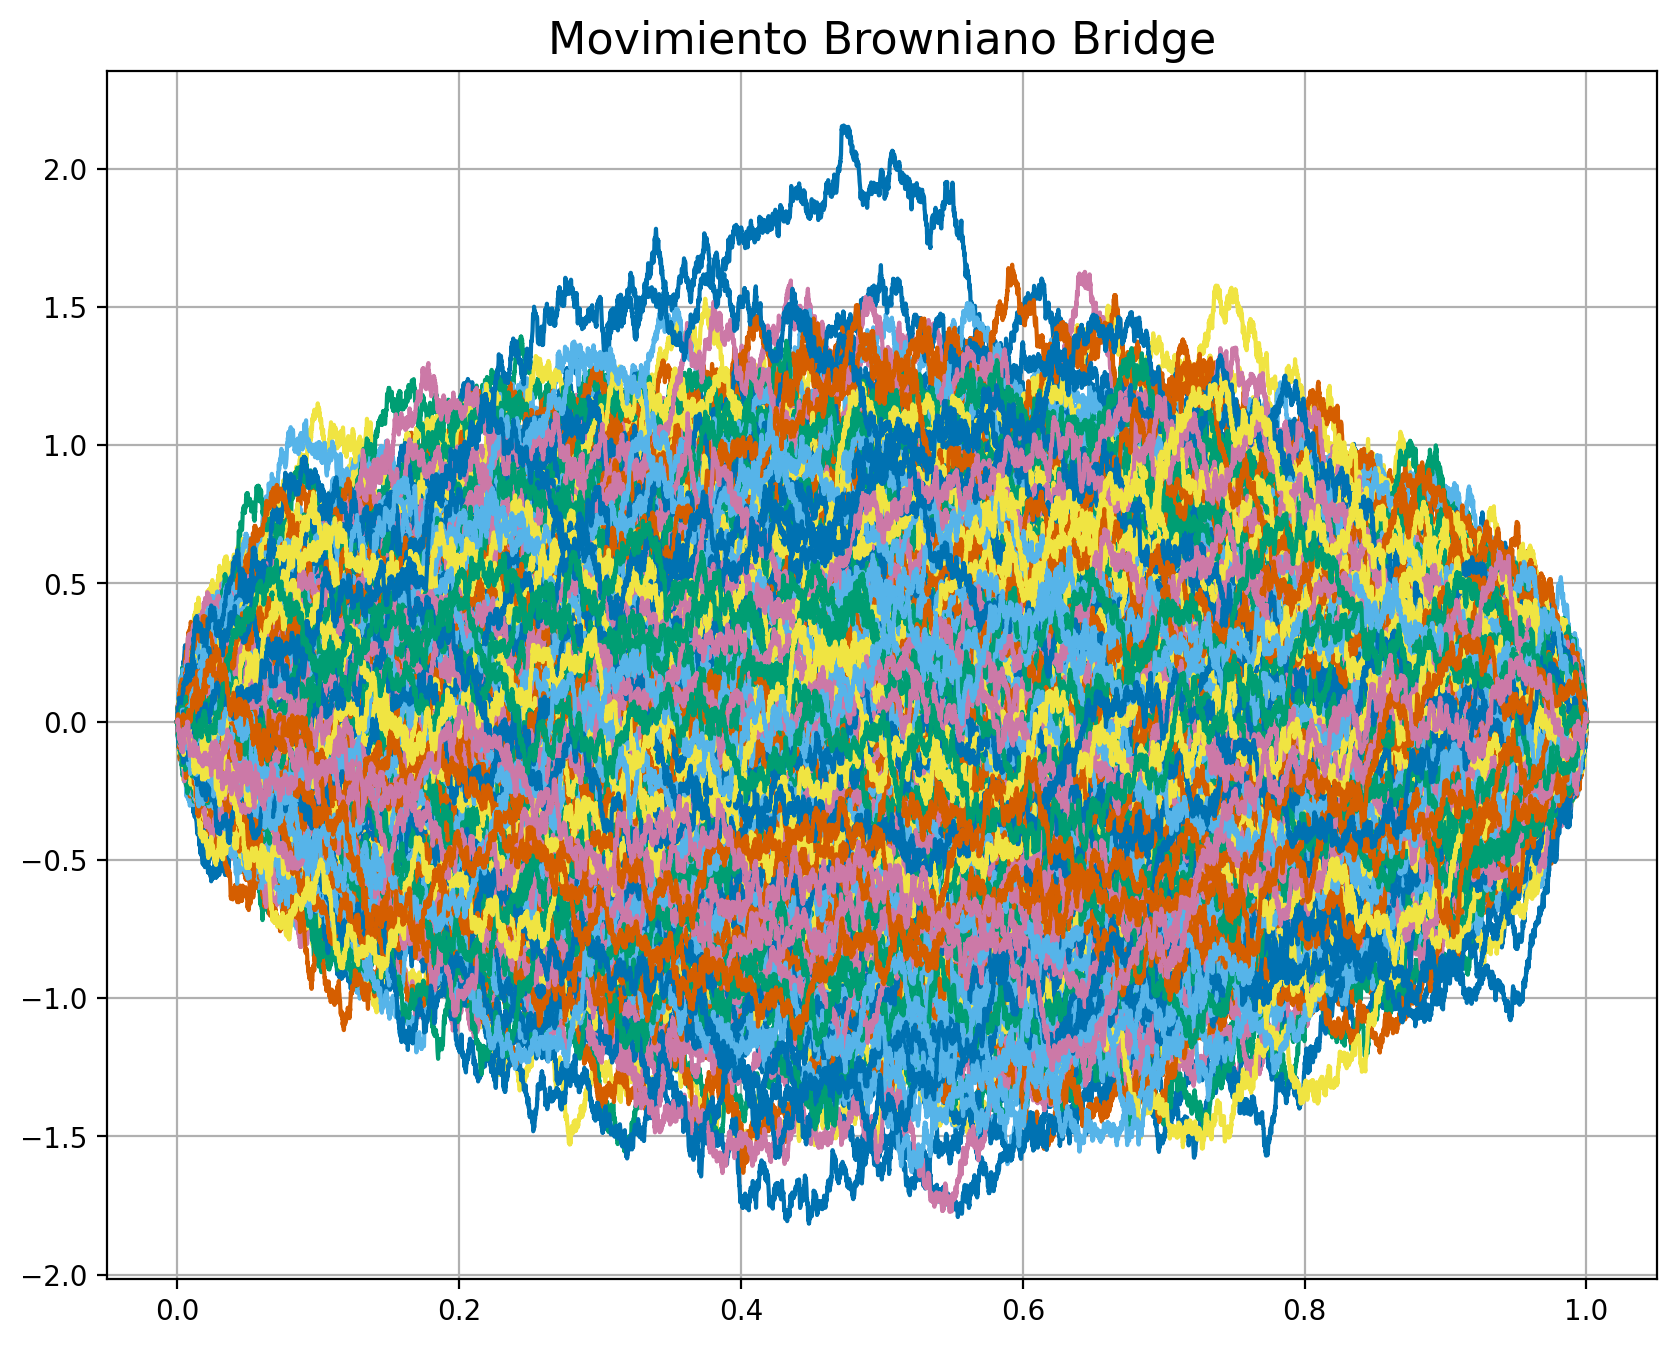

In [16]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(10,8), dpi=100)
ax.set_title('Movimiento Browniano Bridge', fontsize=16)
# ax.plot(tiempos, np.transpose(mbb))
ax.plot(tim, np.transpose(mbb))
ax.grid(True)